# Домашнее задание №1. Pandas. numpy. Обработка данных.

## Ф.И.О: Бедрин Павел Александрович

Домашнее задание состоит из **2**-х частей: 
- **Первая часть** посвящена эффективной реализации функций подсчета расстояния с использованием библиотеки _numpy_.
- **Вторая часть** предполагает заполнение предложенного блокнота.

### Часть 0.
- Вписать Ваши ФИО в предложенное поле.


### Часть 1. (5 баллов)
- реализуйте функции для вычисления расстояния из модуля ``tasks`` с использованием _numpy_
- запрещается использовать циклы и конструкцию list comprehension
- запрещается использовать сторонние библиотеки(за исключением _numpy_)
- для проверки можете использовать предложенные unit-тесты
   - чтобы запустить их в консоли выполните:
      ``$ python -m unittest``

### Часть 2. (15 баллов)
- заполните предложенный блокнот кодом и ответами на вопросы, где это требуется

----------------------------------------

**На проверку требуется отправить zip архив, который будет содержать следующие файлы:**
 - модуль ``tasks.py`` с реализованными функциями
 - заполненный блокнот в формате ``.ipybn``
 - заполненный блокнот в формате ``.html`` **(File -> Save and Export Notebook As -> HTML -> ...)**
 - файл ``answer.csv``, который получится в результате работы над блокнотом

### Часть 2. (15 points)

----------------------------

#### __1__. (2 points)

__1.1__. Импортируйте все необходимые библиотеки.

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

__1.2__. Загрузите файл `train.csv` и сохраните его в переменную `df`. Выведите первые 10 строчек таблицы.

In [3]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df = pd.read_csv("data/train.csv")
df.head(10)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0
5,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,380.0,POS,0,0.0
6,01/10/2017,1,5814,NaN,810,10OCT17:00:00:00,378.0,POS,0,0.0
7,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,199.0,POS,0,0.0
8,01/10/2017,1,5814,NaN,810,11OCT17:00:00:00,400.0,POS,0,0.0
9,01/07/2017,1,5411,NaN,810,26JUL17:00:00:00,598.0,POS,0,0.0


In [4]:
np.random.seed(9564)
index = np.random.choice(len(df), replace=False, size=1000)

__1.3__.1. Выведите размер получившейся таблицы. 

In [128]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

table_size = df.shape
print(f"Размер таблицы: {table_size}")

Размер таблицы: (490513, 10)


__1.3__.2. Выведите статистики (среднее, дисперссию, кванти́ли, количество значений и т.п.) по каждому из столбцов. Воспользуйтесь специальным методом у `df`.

In [129]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df.describe()

,cl_id,MCC,currency,amount,target_flag,target_sum
count,490513.000,490513.000,490513.000,4.905e+05,490513.000,4.905e+05
mean,4802.127,5699.784,810.602,5.724e+03,0.653,1.627e+05
std,2986.493,662.933,38.223,7.704e+04,0.476,1.474e+06
min,0.000,742.000,32.000,4.000e-02,0.000,0.000e+00
25%,2193.000,5411.000,810.000,2.240e+02,0.000,0.000e+00
50%,4576.000,5661.000,810.000,6.240e+02,1.000,2.491e+04
75%,7390.000,5941.000,810.000,2.176e+03,1.000,1.516e+05
max,10215.000,9405.000,986.000,3.584e+07,1.000,4.607e+07


Опиание столбцов:
* PERIOD – месяц транзакции;
* cl_id – id клиента;
* MCC – код категории продавца;
* channel_type – канал привлечения клиента;
* currency – валюта;
* TRDATETIME – дата/время транзакции;
* amount – сумма транзакции;
* trx_category – вид транзакции.

Виды транзакций:
* POS – оплата через POS терминал;
* C2C_IN – перевод на карту (входящий платёж);
* C2C_OUT – перевод на карту (исходящий платёж);
* DEPOSIT – пополнение карты в банкомате;
* WD_ATM_PARTNER – снятие наличных в банкоматах партнерах банка *UNKNOWN*;
* WD_ATM_ROS – снятие наличных в банкоматах банка *UNKNOWN*;
* WD_ATM_OTHER – снятия в других банкоматах;
* BACK_TRX – возврат средств при возврате покупки;
* CAT – операции в банкоматах;
* CASH_ADV – снятие карты в кассе банка.

__1.4__. Какие столбцы имеют пропущенные значения? Сколько пропущенных значений?

In [130]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df.isna().sum()  # Пропуски только в 'channel_type' - 2910 штук

PERIOD             0
cl_id              0
MCC                0
channel_type    2910
currency           0
TRDATETIME         0
amount             0
trx_category       0
target_flag        0
target_sum         0
dtype: int64

__1.5__. Какие уникальные значения существуют у столбца `currency`?

In [6]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df["currency"].unique()

array([810, 978, 504, 704, 981, 985, 840, 949,  51, 826, 214, 764, 203,
       702, 360, 756, 933, 975,  36, 191, 784, 980, 124, 398, 376, 944,
       352, 417, 156, 752, 392, 484, 634, 188, 643, 348, 356, 458, 986,
       498, 578, 208, 344,  32, 410, 788, 480, 604, 941, 144, 946, 710,
       690,  44, 170, 901, 608, 554, 462])

__1.6__. Заполните пропуски в столбце `channel_type` значением `type0`. Результат должен сохраниться в переменной `df`.

In [132]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df["channel_type"] = df["channel_type"].fillna("type0")

In [133]:
df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,type0,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,type0,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,type0,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,type0,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,type0,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


__1.7__. Посчитайте, сколько записей приходится на каждое уникальное значение столбца `channel_type`.

In [134]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df["channel_type"].value_counts()

channel_type
type1    299247
type2    175013
type5      5587
type4      4476
type3      3280
type0      2910
Name: count, dtype: int64

__1.8__. Найдите топ-3 `MCC` категорий с наибольшим объемом трат.

In [135]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df.groupby("MCC")["amount"].sum().nlargest(3)

MCC
6011    1.494e+09
6012    1.849e+08
5411    1.347e+08
Name: amount, dtype: float64

----------------------------------

#### __2__. (1 point)

__2.1__. Сделайте значения в столбцах `channel_type` и `trx_category` категориальными.

In [136]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df[["channel_type", "trx_category"]] = df[["channel_type", "trx_category"]].astype("category")
df[["channel_type", "trx_category"]].dtypes

channel_type    category
trx_category    category
dtype: object

__2.2__. Сделайте столбец `trx_category_mul`, которая показывает увеличение (значение в столбце равно +1) и уменьшение средств (значение в столбце равно -1) на счете клиента банка. Операции, которые увеличивают количество средств на счете:
`C2C_IN`, `DEPOSIT`, `BACK_TRX`. Считайте, что остальные операции уменьшают количество средств на счете.

In [137]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df["trx_category_mul"] = df["trx_category"].isin({"C2C_IN", "DEPOSIT", "BACK_TRX"}).astype(int).replace(0, -1)

In [138]:
df.loc[:, ['trx_category_mul', 'trx_category']].head()

,trx_category_mul,trx_category
0,-1,POS
1,1,DEPOSIT
2,-1,POS
3,-1,POS
4,-1,C2C_OUT


-------------------------------------------------

#### __3__. (1 point)

__3.0__. Приведем столбец `TRDATETIME` к типу даты.

In [139]:
from datetime import datetime

df["TRDATETIME"] = pd.to_datetime(df["TRDATETIME"], format='%d%b%y:%H:%M:%S')

Извлеките из столбца `TRDATETIME` следующие признаки:
* `mday` – день (с начала месяца);
* `ymonth` – месяц;
* `year` – год;
* `wday` – день недели;
* `is_weekend` – является ли день выходным днем.

Извлеченные признаки запишите в таблицу `df_time`.

In [140]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df_time = pd.DataFrame()
df_time["is_weekend"] = df["TRDATETIME"].dt.weekday >= 5
df_time["mday"] = df["TRDATETIME"].dt.day
df_time["wday"] = df["TRDATETIME"].dt.weekday
df_time["year"] = df["TRDATETIME"].dt.year
df_time["ymonth"] = df["TRDATETIME"].dt.month

In [141]:
df_time.head()

,is_weekend,mday,wday,year,ymonth
0,True,21,5,2017,10
1,False,12,3,2017,10
2,False,5,1,2017,12
3,True,21,5,2017,10
4,False,24,1,2017,10


__3.1__. Объедините таблицы `df` и `df_time` и сохраните результат в `df`. При объединении используйте аргумент `sort=False`, если он имеется.

In [142]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df = pd.concat([df, df_time], axis=1, sort=False)

In [143]:
df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,trx_category_mul,is_weekend,mday,wday,year,ymonth
0,01/10/2017,0,5200,type0,810,2017-10-21 00:00:00,5023.0,POS,0,0.0,-1,True,21,5,2017,10
1,01/10/2017,0,6011,type0,810,2017-10-12 12:24:07,20000.0,DEPOSIT,0,0.0,1,False,12,3,2017,10
2,01/12/2017,0,5921,type0,810,2017-12-05 00:00:00,767.0,POS,0,0.0,-1,False,5,1,2017,12
3,01/10/2017,0,5411,type0,810,2017-10-21 00:00:00,2031.0,POS,0,0.0,-1,True,21,5,2017,10
4,01/10/2017,0,6012,type0,810,2017-10-24 13:14:24,36562.0,C2C_OUT,0,0.0,-1,False,24,1,2017,10


--------------------------

#### __4__. (1 point)

__4.1__. Загрузите таблицу `mcc_codes_ru.csv` и сохраните в переменную `df_mcc`. Выведите первые 5 строчек таблицы.

In [144]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df_mcc = pd.read_csv("data/mcc_codes_ru.csv")
df_mcc.head()

,MCC,Название,Группа,Обновлено
0,742,Ветеринарные услуги,Контрактные услуги,31.01.18
1,763,Сельскохозяйственные кооперативы,Контрактные услуги,31.01.18
2,780,Услуги садоводства и ландшафтного дизайна,Контрактные услуги,31.01.18
3,1520,Генеральные подрядчики – жилое и коммерческое ...,Контрактные услуги,31.01.18
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",Контрактные услуги,31.01.18


__4.2__. Переименуйте столбцы в `df_mcc` следующим образом:
* `MCC` -> `MCC`;
* `Название` -> `mcc_name`;
* `Группа` -> `mcc_group`;
* `Обновлено` -> `updated`.

Результат сохраните в `df_mcc`.

In [145]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df_mcc.rename(columns={"MCC": "MCC", "Название": "mcc_name", "Группа": "mcc_group", "Обновлено": "updated"}, inplace=True)

In [146]:
df_mcc.head()

,MCC,mcc_name,mcc_group,updated
0,742,Ветеринарные услуги,Контрактные услуги,31.01.18
1,763,Сельскохозяйственные кооперативы,Контрактные услуги,31.01.18
2,780,Услуги садоводства и ландшафтного дизайна,Контрактные услуги,31.01.18
3,1520,Генеральные подрядчики – жилое и коммерческое ...,Контрактные услуги,31.01.18
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",Контрактные услуги,31.01.18


__4.3__. Удалите столбец `updated` из `df_mcc`, результат сохраните в `df_mcc`.

In [147]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df_mcc = df_mcc.drop(columns=["updated"])

In [148]:
df_mcc.head()

,MCC,mcc_name,mcc_group
0,742,Ветеринарные услуги,Контрактные услуги
1,763,Сельскохозяйственные кооперативы,Контрактные услуги
2,780,Услуги садоводства и ландшафтного дизайна,Контрактные услуги
3,1520,Генеральные подрядчики – жилое и коммерческое ...,Контрактные услуги
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",Контрактные услуги


__4.4__. Закодируйте столбец `mcc_group` с помощью label-кодирования.

In [149]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_mcc["mcc_group"] = label_encoder.fit_transform(df_mcc["mcc_group"])

In [150]:
df_mcc.head()

,MCC,mcc_name,mcc_group
0,742,Ветеринарные услуги,6
1,763,Сельскохозяйственные кооперативы,6
2,780,Услуги садоводства и ландшафтного дизайна,6
3,1520,Генеральные подрядчики – жилое и коммерческое ...,6
4,1711,"Генеральные подрядчики по вентиляции, теплосна...",6


--------------------------------------
#### __5__. (2 points)

__5.1__. Присоедините к таблице `df` столбец `mcc_group`. Результат сохраните в `df`.

**Какой тип JOIN-а подойдет лучше всего для этой задачи?**

$\textcolor{red}{Ваш \ ответ: }$ left outer join, чтобы сохранить все строки df при присоединении к ней mcc_group

In [151]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df = df.merge(df_mcc[["MCC", "mcc_group"]], on="MCC", how="left")

In [152]:
df.iloc[index].head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,trx_category_mul,is_weekend,mday,wday,year,ymonth,mcc_group
51305,01/06/2017,913,7230,type2,810,2017-06-14,2100.0,POS,1,449004.29,-1,False,14,2,2017,6,7.0
226863,01/07/2017,4183,5499,type1,810,2017-07-20,140.0,POS,1,132726.55,-1,False,20,3,2017,7,17.0
124479,01/11/2017,2253,5735,type2,810,2017-11-28,397.0,POS,1,59.00,-1,False,28,1,2017,11,15.0
11132,01/08/2017,225,5411,type4,810,2017-08-07,44.9,POS,1,466235.45,-1,False,7,0,2017,8,17.0
473017,01/03/2017,9869,5812,type1,810,2017-03-30,350.0,POS,0,0.00,-1,False,30,3,2017,3,15.0


----------------------------------------

#### __6__. (2 points) 
Выведите сумму, среднее и среднеквадратичное отклонение трат `amount` по каждой из категорий `trx_category` в рамках канала привлечения `channel_type`.

In [153]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df.groupby(["channel_type", "trx_category"], observed=True)["amount"].agg(["sum", "mean", "std"])

sum       mean         std
channel_type trx_category                                    
type0        BACK_TRX        3.319e+04   8297.250    4781.941
             C2C_IN          9.402e+05  22386.441   29685.787
             C2C_OUT         2.033e+05   4148.317    6442.629
             CAT             8.404e+04   9338.331    6850.960
             DEPOSIT         2.608e+06  18363.380   19525.900
             POS             4.414e+06   1776.817    6213.823
             WD_ATM_OTHER    1.112e+06  52933.333  225027.019
             WD_ATM_PARTNER  2.285e+05   6528.571   16563.382
             WD_ATM_ROS      1.796e+06  14487.097   31677.891
type1        BACK_TRX        2.055e+07  10979.486   55181.355
             C2C_IN          7.037e+07  13497.176   21455.762
             C2C_OUT         4.609e+07  16562.824   25755.712
             CASH_ADV        6.548e+05  25185.410   59272.348
             CAT             7.320e+06  16087.923   74133.156
             DEPOSIT         3.691e+08  21132.086   27362.956
             POS             6.323e+08   2472.164   70228.802
             WD_ATM_OTHER    3.840e+07  19145.017  177771.182
             WD_ATM_PARTNER  2.264e+08  47388.371   71325.839
             WD_ATM_ROS      3.837e+08  43278.339   55730.322
type2        BACK_TRX        3.422e+06   4700.521   12835.219
             C2C_IN          2.698e+07  14020.438   25895.815
             C2C_OUT         3.938e+07  15804.485   25665.438
             CASH_ADV        2.580e+05  32250.535   52204.208
             CAT             1.045e+07  16335.570   81574.126
             DEPOSIT         8.448e+07  30597.081   38968.512
             POS             3.464e+08   2357.908   98286.422
             WD_ATM_OTHER    3.421e+07   6909.320   32450.823
             WD_ATM_PARTNER  9.920e+07  20572.605   33867.718
             WD_ATM_ROS      2.699e+08  27632.246   43508.296
type3        BACK_TRX        3.222e+05  20139.201   35475.888
             C2C_IN          8.701e+04  10876.250   12332.637
             C2C_OUT         3.543e+04   5061.857    7569.332
             CAT             2.408e+06  63373.589  122651.324
             DEPOSIT         4.344e+06  23227.273   23103.532
             POS             7.837e+06   2755.509   10612.661
             WD_ATM_OTHER    2.460e+05   9840.080   19904.776
             WD_ATM_PARTNER  2.386e+06  28401.190   36133.539
             WD_ATM_ROS      2.274e+06  32023.944   44980.924
type4        BACK_TRX        2.259e+05   7531.287   28910.156
             C2C_IN          8.869e+05  15291.915   12320.494
             C2C_OUT         1.846e+06  20977.273   26067.515
             CAT             6.288e+04  12575.312   17346.537
             DEPOSIT         1.190e+07  39282.607   42093.366
             POS             1.169e+07   3138.924   23228.570
             WD_ATM_OTHER    1.829e+05   4572.299    4388.775
             WD_ATM_PARTNER  3.161e+06  38085.542   56640.958
             WD_ATM_ROS      7.700e+06  53475.694   66417.188
type5        BACK_TRX        6.224e+04   1682.229    2331.338
             C2C_IN          6.334e+05  10556.333   11777.934
             C2C_OUT         5.111e+05  13812.508   20574.017
             CAT             2.273e+06  45459.432   30754.892
             DEPOSIT         1.036e+07  28865.955   33653.585
             POS             1.036e+07   2218.382   20558.593
             WD_ATM_OTHER    6.203e+05   6461.146   16581.908
             WD_ATM_PARTNER  1.367e+06   9300.000   19181.198
             WD_ATM_ROS      2.724e+06  20636.364   32177.241

---------------------------------

#### __7__. (2 points) 

Выведите топ-5 клиентов, с наибольшим оборотом по `С2С` транзакциям. Под оборотом подразумевается полный объем полученных и переведенных средств без учета знака (т.е. не имеет значения получал ли клиент средства на свой счет, или переводил их на другой счет).

In [154]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df[df["trx_category"].isin({"C2C_IN", "C2C_OUT"})].groupby("cl_id")["amount"].agg("sum").nlargest(5)

cl_id
4445    3.237e+06
1408    1.896e+06
4211    1.714e+06
5373    1.262e+06
4340    1.259e+06
Name: amount, dtype: float64

-------------------------------------------

#### __8__. (2 points) 

__8.1.__ Прологарифмируйте сумму трат `amount`, а результат сохраните в столбец `amount_log`. Как нужно логарифмировать, чтобы не было проблем при `amount == 0`?

In [155]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

df["amount_log"] = np.log1p(df["amount"])

# Можно использовать log1p. Считаем ln(1 + x) - добавляем небольшой сдвиг
# всей колонке, чтобы избежать ln(0)

__8.2__. Выполните onehot-кодирование для столбцов `channel_type` и `trx_category`. Полученные столбцы присоедините к таблице `df`, результат сохраните в переменную `df`.  

In [156]:
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

from sklearn.preprocessing import OneHotEncoder

onehot_columns = ["channel_type", "trx_category"]
onehot_encoder = OneHotEncoder(dtype=int)
onehot_df = pd.DataFrame(
    onehot_encoder.fit_transform(df[onehot_columns]).toarray(),
    columns=onehot_encoder.get_feature_names_out()
)
df = pd.concat([df, onehot_df], axis=1)

In [157]:
df.iloc[index].head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,trx_category_mul,is_weekend,mday,wday,year,ymonth,mcc_group,amount_log,channel_type_type0,channel_type_type1,channel_type_type2,channel_type_type3,channel_type_type4,channel_type_type5,trx_category_BACK_TRX,trx_category_C2C_IN,trx_category_C2C_OUT,trx_category_CASH_ADV,trx_category_CAT,trx_category_DEPOSIT,trx_category_POS,trx_category_WD_ATM_OTHER,trx_category_WD_ATM_PARTNER,trx_category_WD_ATM_ROS
51305,01/06/2017,913,7230,type2,810,2017-06-14,2100.0,POS,1,449004.29,-1,False,14,2,2017,6,7.0,7.650,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
226863,01/07/2017,4183,5499,type1,810,2017-07-20,140.0,POS,1,132726.55,-1,False,20,3,2017,7,17.0,4.949,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
124479,01/11/2017,2253,5735,type2,810,2017-11-28,397.0,POS,1,59.00,-1,False,28,1,2017,11,15.0,5.986,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
11132,01/08/2017,225,5411,type4,810,2017-08-07,44.9,POS,1,466235.45,-1,False,7,0,2017,8,17.0,3.826,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
473017,01/03/2017,9869,5812,type1,810,2017-03-30,350.0,POS,0,0.00,-1,False,30,3,2017,3,15.0,5.861,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


-----------------------------------------

#### __9__. (2 points за правильную итоговую подтаблицу)

Сохраните итоговую подтаблицу в файл.

In [158]:
df.iloc[index].to_csv('answer.csv', index=False, sep=',')

-----------------------------------------

## Бонусная часть (+3 балла)

Попробуйте придумать решающее правило (без использования алгоритмов машинного обучения), по которому можно было бы предсказать значение переменной `target_flag`. **Запрещается** использовать переменную `target_sum`.

Разобъем выборку на тренировочную и отложенную.

In [219]:
from sklearn.model_selection import train_test_split

mask = df.columns.str.startswith('target_')

target_cols  = df.columns[mask]
feature_cols = df.columns[~mask]

X, y = df.loc[:, feature_cols], df.loc[:, target_cols]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=9872)

Ваше решение должно побить следующий бейзлайн:

```python
from sklearn.metrics import accuracy_score

assert accuracy_score(y_test['target_flag'], y_pred) > 0.7
```

**Запрещается** использовать отложенную выборку `(X_test, y_test)` для выбора решения.

**Вопрос:** Что показывает метрика `accuracy`?

$\textcolor{red}{Ваш \ ответ:}$ доля верных предсказаний от всех предсказаний

### Вопросы и подсказки

Исследуйте рапределения и зависимости между признаками отностительно целевой переменной `target_flag`. Для решения этой задачи вам может быть полезна визуализация.

1. Какие любопытные выводы можно сделать из такого анализа?
2. Какие проблемы возникают с визуализацией совместного распредления категориальных (дискретных) и непрерывных значений? Как эту проблему можно решить?
3. В исходном датасете очень много записей, поэтому визуализация может работать **неприемлемо** долго. Как решить эту проблему?

Приведите ниже код и комментарии с ответами на вопросы выше.

__Ответы на вопросы:__

**1.** На уровне отдельных транзакций по heatmap видны просадки доли target_flag=1 в некоторых категориях операций и каналах привлечения. Это внесло вклад в рост качества на тесте. На уровне клиентов видно, что у большинства при target_flag=0 период активности (дни между первой и последней транзакцией) в среднем меньше, чем при target_flag=1.

**2.** Категориальных признаков может быть слишком много для визуализации. В таком случае можно попытаться сгруппировать их в более крупные группы, как было сделано с MCC-кодами. 

**3.** Можно использовать случайные подвыборки меньшего размера. В нашем случае можно заметить, что target_flag ставится не на уровне транзакций, а на уровне клиентов, которые их совершают. Сгруппировав данные по клиентам, можно получить таблицу гораздо меньшего размера и делать визуализации и выводы по ней.

In [220]:
print("Число транзакций в train:", len(X_train))
print("Число клиентов в train:", train_clients_cnt := X_train['cl_id'].nunique(), "\n")

print(f"У каждого из {train_clients_cnt} клиентов ровно 1 уникальный флаг: ")
print(X_train.join(y_train["target_flag"]).groupby("cl_id")["target_flag"].nunique().value_counts())
print(f"Таким образом, target_flag действительно одинаков в рамках транзакций одного клиента.")

Число транзакций в train: 343359
Число клиентов в train: 4980 

У каждого из 4980 клиентов ровно 1 уникальный флаг: 
target_flag
1    4980
Name: count, dtype: int64
Таким образом, target_flag действительно одинаков в рамках транзакций одного клиента.


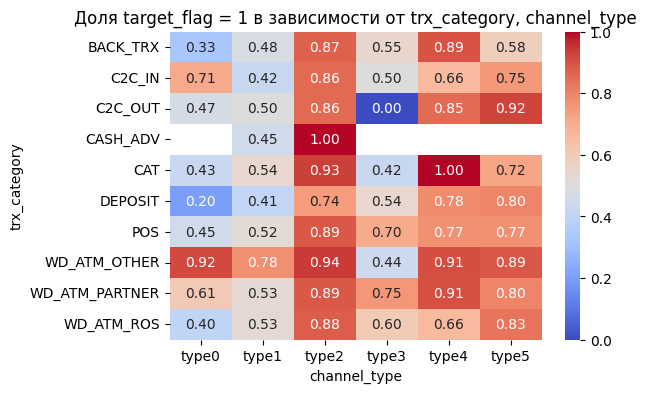

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Уровень транзакций
heatmap_cat_ch = pd.crosstab(X_train["trx_category"], X_train["channel_type"], 
                             values=y_train['target_flag'], aggfunc="mean")

plt.figure(figsize=(6, 4))
plt.title("Доля target_flag = 1 в зависимости от trx_category, channel_type")
sns.heatmap(heatmap_cat_ch, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [228]:
# Уровень клиентов
train_clients_df = (
    X_train.join(y_train["target_flag"])
    .groupby("cl_id")
    .agg({
        "target_flag": "min",  # all equals
        "trx_category": set,
        "channel_type": set,
        "TRDATETIME": lambda x: (x.max() - x.min()).days
    }).rename(columns={"TRDATETIME": "days_distance"})).reset_index()

train_clients_df.head()

,cl_id,target_flag,trx_category,channel_type,days_distance
0,0,0,"{DEPOSIT, POS}",{type0},53
1,1,0,"{DEPOSIT, POS, WD_ATM_ROS}",{type0},92
2,5,1,"{C2C_OUT, BACK_TRX, DEPOSIT, WD_ATM_ROS, WD_AT...",{type0},92
3,9,0,"{DEPOSIT, WD_ATM_ROS, POS, C2C_IN}",{type0},85
4,10,0,"{C2C_OUT, C2C_IN, DEPOSIT, WD_ATM_ROS, WD_ATM_...",{type0},88


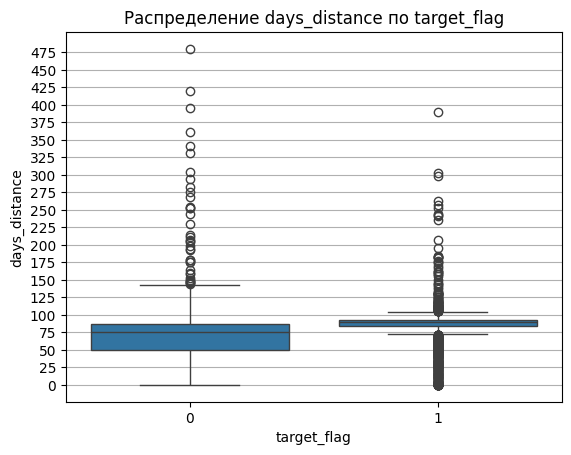

In [223]:
sns.boxplot(x=train_clients_df["target_flag"], y=train_clients_df["days_distance"])
plt.title("Распределение days_distance по target_flag")
plt.grid(axis="y")
plt.yticks(range(0, 500, 25))
plt.show()

In [224]:
q1 = train_clients_df.groupby("target_flag")["days_distance"].quantile(0.25)
q3 = train_clients_df.groupby("target_flag")["days_distance"].quantile(0.75)
iqr = q3 - q1

lower_whisker = q1 - 1.5 * iqr
lower_whisker

target_flag
0    -6.75
1    72.00
Name: days_distance, dtype: float64

### Решение

Если инициализировать y_pred единицами, уже получим accuracy ≈ 0.65. На основе замеченных закономерностей составим правила, зануляющие некоторые объекты.

In [225]:
y_pred = pd.Series(1, index=X_test.index)  # Инициализируем y_pred

test_clients_df = (
    X_test.groupby("cl_id")
    .agg(
        {
            "trx_category": set,
            "channel_type": set,
            "TRDATETIME": lambda x: (x.max() - x.min()).days,
        }
    ).rename(columns={"TRDATETIME": "days_distance"})).reset_index()

mask_over_clients = (
    (
        test_clients_df["trx_category"].apply(lambda x: bool(x.intersection({"DEPOSIT", "BACK_TRX"})))
        & test_clients_df["channel_type"].apply(lambda x: any(t in x for t in ["type0", "type1"]))
        & test_clients_df["trx_category"].apply(lambda x: x.isdisjoint({"WD_ATM_OTHER"}))
    )
    | (test_clients_df["days_distance"] < 72)
)

clients_to_zero = test_clients_df.loc[mask_over_clients, "cl_id"]
y_pred.loc[X_test['cl_id'].isin(clients_to_zero)] = 0

In [226]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test['target_flag'], y_pred)

0.7080813297633771